In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu, sigma = 0.4, 0.1
n = 1000

In [3]:
x = np.random.normal(mu, sigma, n)

In [4]:
abs(mu - np.mean(x))

0.002603184056027219

In [5]:
abs(sigma - np.std(x, ddof=1))

0.003440229193396954

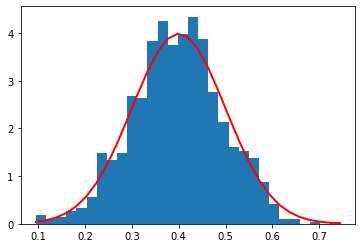

In [6]:
count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2*np.pi))*np.exp(- (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

In [7]:
x.size

1000

In [8]:
delta = 0.1

In [9]:
def epsilon_cut(W, i):
    n = W.size
    if i == 0 or n - i == 0:
        m = n
    else:
        m = 1 / (1 / i + 1 / (n - i))

    delta_prime = delta / n
    return np.sqrt(2 / m * (W.std() ** 2) * np.log(2 / delta_prime)) + 2 / (3 * m) * np.log(2 / delta_prime)

In [10]:
w_mus = []
w_sizes = []

In [11]:
def adwin(x):
    global w_mus, w_sizes
    w_mus = []
    w_sizes = []
    W = np.array([])
    n = x.size
    for t in range(n):
        W = np.append(W, x[t])

        # for every split of W into W0=W[O:i], W1=W[i:len(W)]
        w_size = W.size
        for i in range(1, w_size):
            # UNTIL: abs(mu_W0-mu_W1) >= epsilon_cut holds
            dif = np.abs(W[0:i].mean() - W[i:w_size].mean())
            e_cut = epsilon_cut(W, i)
            if dif >= e_cut:
                # REPEAT: drop oldest element in W
                W = np.delete(W, 0)
                print(f'Drift is detected at {t} mu = {W.mean():.3f}')
        w_mus.append(W.mean())
        w_sizes.append(W.size)
        if t%50 == 0:
            print(f'Time = {t} Window size = {W.size}, mu = {W.mean():.3f}')
    print(f'Final window size = {W.size}')

In [12]:
adwin(x)

Time = 0 Window size = 1, mu = 0.429
Time = 50 Window size = 51, mu = 0.398
Time = 100 Window size = 101, mu = 0.395
Time = 150 Window size = 151, mu = 0.396
Time = 200 Window size = 201, mu = 0.396
Time = 250 Window size = 251, mu = 0.392
Time = 300 Window size = 301, mu = 0.392
Time = 350 Window size = 351, mu = 0.391
Time = 400 Window size = 401, mu = 0.392
Time = 450 Window size = 451, mu = 0.393
Time = 500 Window size = 501, mu = 0.392
Time = 550 Window size = 551, mu = 0.394
Time = 600 Window size = 601, mu = 0.395
Time = 650 Window size = 651, mu = 0.395
Time = 700 Window size = 701, mu = 0.395
Time = 750 Window size = 751, mu = 0.395
Time = 800 Window size = 801, mu = 0.396
Time = 850 Window size = 851, mu = 0.396
Time = 900 Window size = 901, mu = 0.396
Time = 950 Window size = 951, mu = 0.396
Final window size = 1000


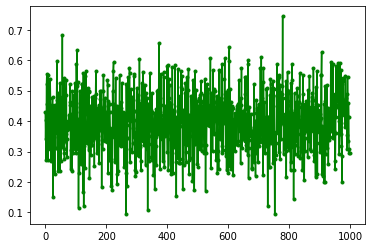

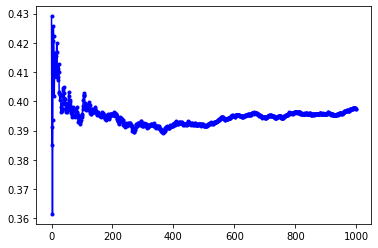

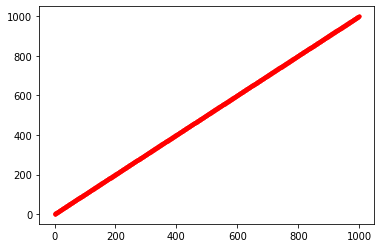

In [13]:
plt.plot(range(x.size), x, color='g', marker='.')
plt.show()
plt.plot(range(x.size), w_mus, color='b', marker='.')
plt.show()
plt.plot(range(x.size), w_sizes, color='r', marker='.')
plt.show()


## Add drift

In [14]:
mu2 = 0.8
x2 = np.random.normal(mu2, sigma, n)
x = np.append(x, x2)
x.size

2000

In [15]:
adwin(x)

Time = 0 Window size = 1, mu = 0.429
Time = 50 Window size = 51, mu = 0.398
Time = 100 Window size = 101, mu = 0.395
Time = 150 Window size = 151, mu = 0.396
Time = 200 Window size = 201, mu = 0.396
Time = 250 Window size = 251, mu = 0.392
Time = 300 Window size = 301, mu = 0.392
Time = 350 Window size = 351, mu = 0.391
Time = 400 Window size = 401, mu = 0.392
Time = 450 Window size = 451, mu = 0.393
Time = 500 Window size = 501, mu = 0.392
Time = 550 Window size = 551, mu = 0.394
Time = 600 Window size = 601, mu = 0.395
Time = 650 Window size = 651, mu = 0.395
Time = 700 Window size = 701, mu = 0.395
Time = 750 Window size = 751, mu = 0.395
Time = 800 Window size = 801, mu = 0.396
Time = 850 Window size = 851, mu = 0.396
Time = 900 Window size = 901, mu = 0.396
Time = 950 Window size = 951, mu = 0.396
Time = 1000 Window size = 1001, mu = 0.398
Drift is detected at 1024 mu = 0.407
Drift is detected at 1024 mu = 0.407
Drift is detected at 1025 mu = 0.407
Drift is detected at 1025 mu = 0

/home/lukec/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  
/home/lukec/venv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/lukec/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


Drift is detected at 1031 mu = 0.414
Drift is detected at 1031 mu = 0.414
Drift is detected at 1031 mu = 0.414
Drift is detected at 1031 mu = 0.414
Drift is detected at 1031 mu = 0.414
Drift is detected at 1031 mu = 0.414
Drift is detected at 1031 mu = 0.414
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
Drift is detected at 1031 mu = 0.415
D

Drift is detected at 1040 mu = 0.451
Drift is detected at 1041 mu = 0.453
Drift is detected at 1041 mu = 0.453
Drift is detected at 1041 mu = 0.452
Drift is detected at 1041 mu = 0.453
Drift is detected at 1041 mu = 0.453
Drift is detected at 1041 mu = 0.453
Drift is detected at 1041 mu = 0.453
Drift is detected at 1041 mu = 0.453
Drift is detected at 1041 mu = 0.453
Drift is detected at 1041 mu = 0.454
Drift is detected at 1041 mu = 0.454
Drift is detected at 1041 mu = 0.454
Drift is detected at 1041 mu = 0.455
Drift is detected at 1041 mu = 0.455
Drift is detected at 1041 mu = 0.455
Drift is detected at 1041 mu = 0.455
Drift is detected at 1041 mu = 0.455
Drift is detected at 1041 mu = 0.455
Drift is detected at 1041 mu = 0.456
Drift is detected at 1041 mu = 0.457
Drift is detected at 1041 mu = 0.457
Drift is detected at 1041 mu = 0.457
Drift is detected at 1041 mu = 0.457
Drift is detected at 1041 mu = 0.458
Drift is detected at 1041 mu = 0.458
Drift is detected at 1041 mu = 0.459
D

Drift is detected at 1117 mu = 0.727
Drift is detected at 1141 mu = 0.740
Time = 1150 Window size = 177, mu = 0.741
Drift is detected at 1189 mu = 0.753
Time = 1200 Window size = 226, mu = 0.756
Time = 1250 Window size = 276, mu = 0.765
Time = 1300 Window size = 326, mu = 0.768
Time = 1350 Window size = 376, mu = 0.775
Drift is detected at 1374 mu = 0.777
Time = 1400 Window size = 425, mu = 0.780
Time = 1450 Window size = 475, mu = 0.781
Time = 1500 Window size = 525, mu = 0.783
Time = 1550 Window size = 575, mu = 0.785
Time = 1600 Window size = 625, mu = 0.787
Time = 1650 Window size = 675, mu = 0.787
Time = 1700 Window size = 725, mu = 0.787
Time = 1750 Window size = 775, mu = 0.789
Time = 1800 Window size = 825, mu = 0.788
Time = 1850 Window size = 875, mu = 0.789
Time = 1900 Window size = 925, mu = 0.790
Time = 1950 Window size = 975, mu = 0.791
Final window size = 1024


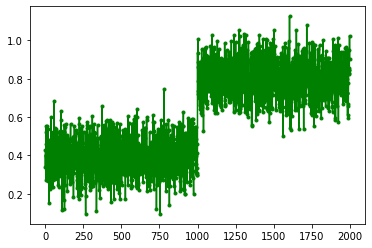

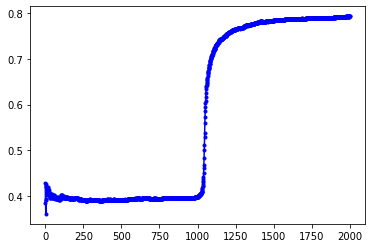

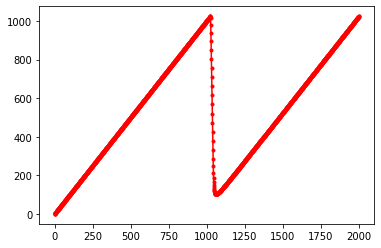

In [16]:
plt.plot(range(x.size), x, color='g', marker='.')
plt.show()
plt.plot(range(x.size), w_mus, color='b', marker='.')
plt.show()
plt.plot(range(x.size), w_sizes, color='r', marker='.')
plt.show()